In [1]:
import numpy as np
import pandas as pd
from phate import PHATE
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from bed_reader import open_bed

bed = open_bed('/home/shussain/popviz/genomic_data/hgdp_QC_IMP.bed').read()

In [2]:
dist = np.loadtxt(
    "/home/shussain/popviz/experiments/using_distance_matrix/hgdp_distance_matrix")
dist

array([[  0.        , 598.87060547, 597.63531494, ..., 736.52832031,
        735.51342773, 737.4083252 ],
       [598.87060547,   0.        , 601.29193115, ..., 737.17974854,
        736.324646  , 739.10015869],
       [597.63531494, 601.29193115,   0.        , ..., 739.1697998 ,
        736.57720947, 740.34246826],
       ...,
       [736.52832031, 737.17974854, 739.1697998 , ...,   0.        ,
        629.86029053, 684.13085938],
       [735.51342773, 736.324646  , 736.57720947, ..., 629.86029053,
          0.        , 684.19805908],
       [737.4083252 , 739.10015869, 740.34246826, ..., 684.13085938,
        684.19805908,   0.        ]])

In [3]:
import pickle

with open("PHATENone.pickle", "rb") as pckl:
    ph_no_pca = pickle.load(pckl)

/home/shussain/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator NearestNeighbors from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
ph_d = PHATE(knn_dist="precomputed", n_pca=None, n_landmark=None)
em = ph_d.fit_transform(dist)

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 1043 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.85 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.11 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.70 seconds.
Calculated PHATE in 2.83 seconds.


In [5]:
ph_d.graph.K

array([[1.        , 0.28557898, 0.30419617, ..., 0.        , 0.        ,
        0.        ],
       [0.28557898, 1.        , 0.28813625, ..., 0.        , 0.        ,
        0.        ],
       [0.30419617, 0.28813625, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12435095,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12435095, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [6]:
ph_no_pca.graph.K.toarray()

array([[1.        , 0.28557925, 0.30419583, ..., 0.        , 0.        ,
        0.        ],
       [0.28557925, 1.        , 0.28813605, ..., 0.        , 0.        ,
        0.        ],
       [0.30419583, 0.28813605, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12435086,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12435086, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

(array([9.33363e+05, 9.29880e+04, 4.06600e+04, 1.44180e+04, 4.91200e+03,
        1.09000e+03, 2.38000e+02, 1.22000e+02, 4.60000e+01, 1.20000e+01]),
 array([0.00000000e+00, 1.42809555e-07, 2.85619110e-07, 4.28428665e-07,
        5.71238219e-07, 7.14047774e-07, 8.56857329e-07, 9.99666884e-07,
        1.14247644e-06, 1.28528599e-06, 1.42809555e-06]),
 <BarContainer object of 10 artists>)

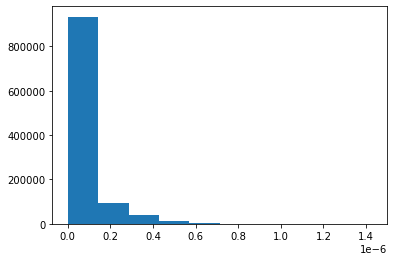

In [7]:
diff = np.abs(ph_d.graph.K - ph_no_pca.graph.K.toarray())
plt.hist(diff.ravel())

In [8]:
ph_d.graph._kernel

array([[1.        , 0.28557898, 0.30419617, ..., 0.        , 0.        ,
        0.        ],
       [0.28557898, 1.        , 0.28813625, ..., 0.        , 0.        ,
        0.        ],
       [0.30419617, 0.28813625, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12435095,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12435095, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [25]:
ph_d.graph.kernel

array([[1.        , 0.28557898, 0.30419617, ..., 0.        , 0.        ,
        0.        ],
       [0.28557898, 1.        , 0.28813625, ..., 0.        , 0.        ,
        0.        ],
       [0.30419617, 0.28813625, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12435095,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.12435095, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

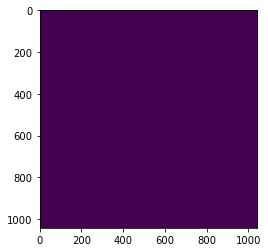

In [22]:
plt.imshow(ph_d.graph._kernel - ph_d.graph.kernel)

In [9]:
ph_d.graph.diff_aff

array([[0.07350453, 0.02253957, 0.02361975, ..., 0.        , 0.        ,
        0.        ],
       [0.02253957, 0.08474707, 0.02402287, ..., 0.        , 0.        ,
        0.        ],
       [0.02361975, 0.02402287, 0.08202178, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02121283, 0.00267016,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00267016, 0.02173594,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01775825]])

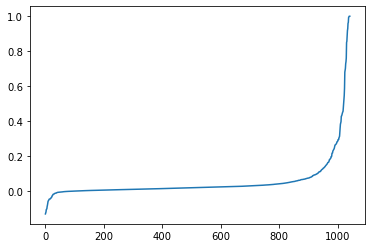

In [22]:
plt.plot(vals[np.argsort(vals)])

In [14]:
vals, vecs = np.linalg.eig(ph.diff_op)

In [20]:
sorted_vecs = vecs[np.argsort(vals)]

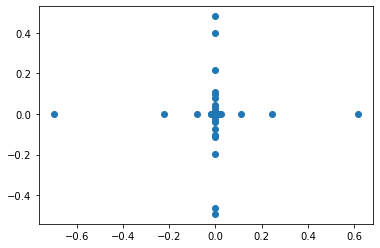

In [21]:
plt.scatter(vecs[:, -1], vecs[:, -2])

In [24]:
sum(ph.diff_op)

array([0.97388214, 0.85290874, 0.88891987, ..., 0.89276577, 0.89671006,
       1.24746939])

In [26]:
sum(ph.diff_op.T)

array([1., 1., 1., ..., 1., 1., 1.])

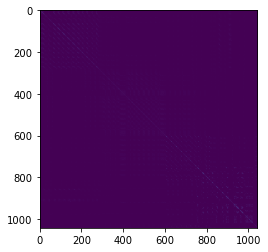

In [8]:
plt.imshow(ph.diff_op)

<AxesSubplot:>

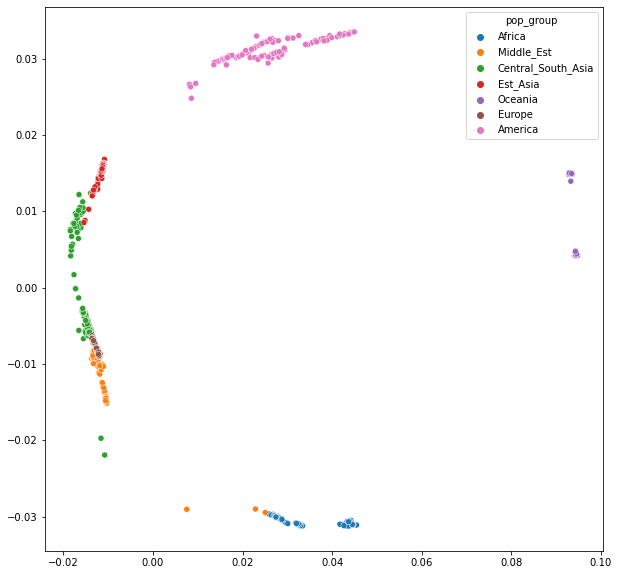

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=em[:, 0], y=em[:, 1], hue=pops['pop_group'])

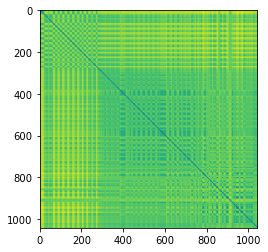

In [6]:
dist = np.loadtxt('hgdp_distance_matrix')
plt.imshow(dist, vmin=300)

(array([1.04300e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.50000e+02,
        3.54000e+02, 1.53000e+03, 1.36758e+05, 7.36418e+05, 2.11596e+05]),
 array([  0.        ,  79.54256592, 159.08513184, 238.62769775,
        318.17026367, 397.71282959, 477.25539551, 556.79796143,
        636.34052734, 715.88309326, 795.42565918]),
 <BarContainer object of 10 artists>)

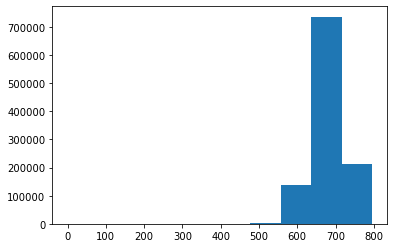

In [5]:
plt.hist(dist.ravel())

In [13]:
from bed_reader import open_bed

hgdp = open_bed('/home/shussain/popviz/genomic_data/hgdp_QC_IMP.bed').read()

In [25]:
from umap import UMAP

UMAPs_raw= UMAP(transform_seed=0).fit_transform(hgdp)

/home/shussain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [5]:
import pandas as pd

pops = pd.read_csv('/home/shussain/popviz/genomic_data/pops.csv')
pops

,ID,Sex,population,geographic_origin,region,pop_group
0,HGDP00448,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
1,HGDP00479,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
2,HGDP00985,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
3,HGDP01094,M,Biaka_Pygmies,Central_African_Republic,Subsaharian_Africa,Africa
4,HGDP00982,M,Mbuti_Pygmies,Democratic_Republic_of_Congo,Subsaharian_Africa,Africa
...,...,...,...,...,...,...
1038,HGDP00953,M,Yakut,Siberia,Asia,Est_Asia
1039,HGDP01070,F,Sardinian,Italy,Europe,Europe
1040,HGDP01376,M,French_Basque,France,Europe,Europe
1041,HGDP00671,M,Sardinian,Italy,Europe,Europe


<AxesSubplot:>

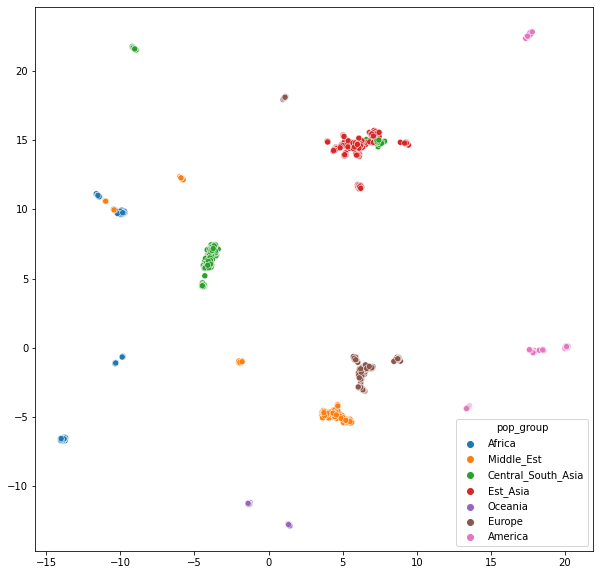

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=UMAPs_raw[:, 0], y=UMAPs_raw[:, 1], hue=pops['pop_group'])

In [28]:
UMAPs_dist = UMAP(metric='precomputed', transform_seed=0).fit_transform(dist)

/home/shussain/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/shussain/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<AxesSubplot:>

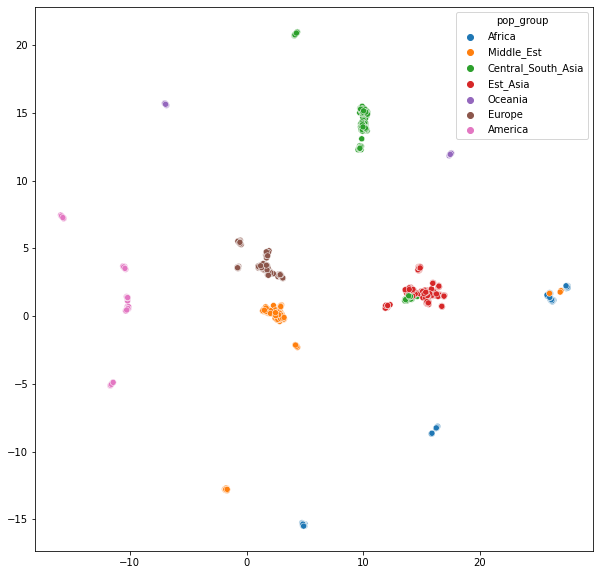

In [29]:

fig, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=UMAPs_dist[:, 0], y=UMAPs_dist[:, 1], hue=pops['pop_group'])